# Modelling Housing Prices with Python

# Predicting with Machine Learning

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [2]:
house_prices = pd.read_csv(r'C:\Users\samha\Documents\Samuel_ZroNet\Me\python\Jupyter files\House Pricing Project/train.csv')

In [3]:
house_prices.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [4]:
house_prices.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

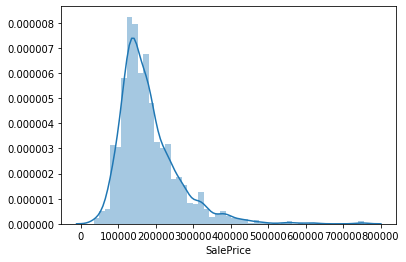

In [5]:
#plotting the SalePrices (histogram)
sns.distplot(house_prices['SalePrice'])

In [6]:
#not normal dist
#shows positive skewness and peakness

In [7]:
house_prices['SalePrice'].skew()

1.8828757597682133

In [8]:
house_prices['SalePrice'].kurt()

6.536281860064534

In [9]:
#PedroMarcelino's
print("Skewness: %f" % house_prices['SalePrice'].skew())
print("Kurtosis: %f" % house_prices['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


## Relationship with my 'expected' numerical values

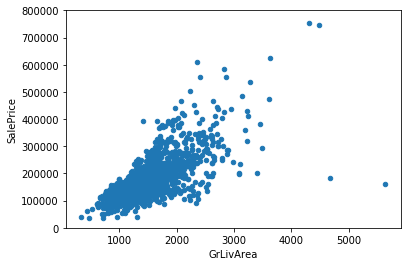

In [10]:
#scatter plot grlivarea/saleprice
var = 'GrLivArea'
data = pd.concat([house_prices['SalePrice'], house_prices[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

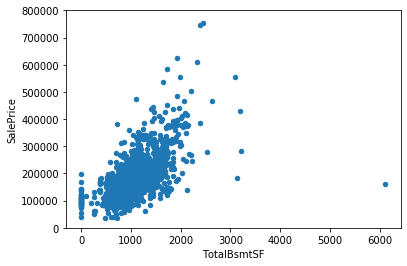

In [11]:
#scatter plot totalbsmtsf/saleprice
var = 'TotalBsmtSF'
data = pd.concat([house_prices['SalePrice'], house_prices[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

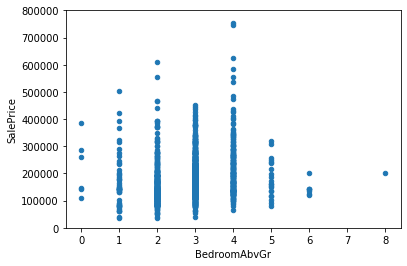

In [12]:
#scatter plot BedroomAbvGr/saleprice
var = 'BedroomAbvGr'
data = pd.concat([house_prices['SalePrice'], house_prices[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

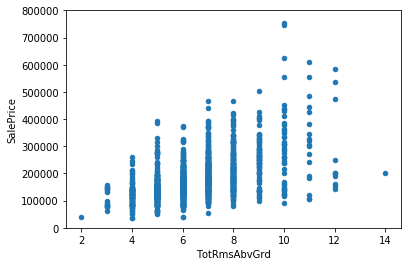

In [13]:
#scatter plot TotRmsAbvGrd/saleprice
var = 'TotRmsAbvGrd'
data = pd.concat([house_prices['SalePrice'], house_prices[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

## Relationship with my 'expected' categorical values

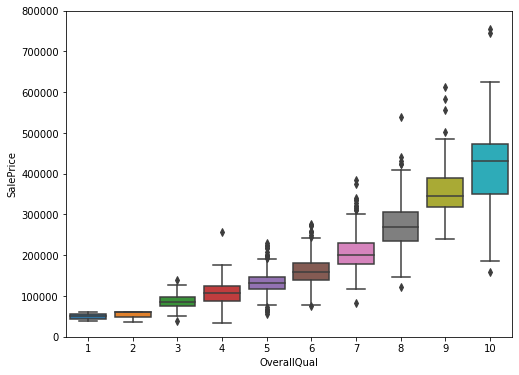

In [14]:
#box plot overallqual/saleprice
var = 'OverallQual'
data = pd.concat([house_prices['SalePrice'], house_prices[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

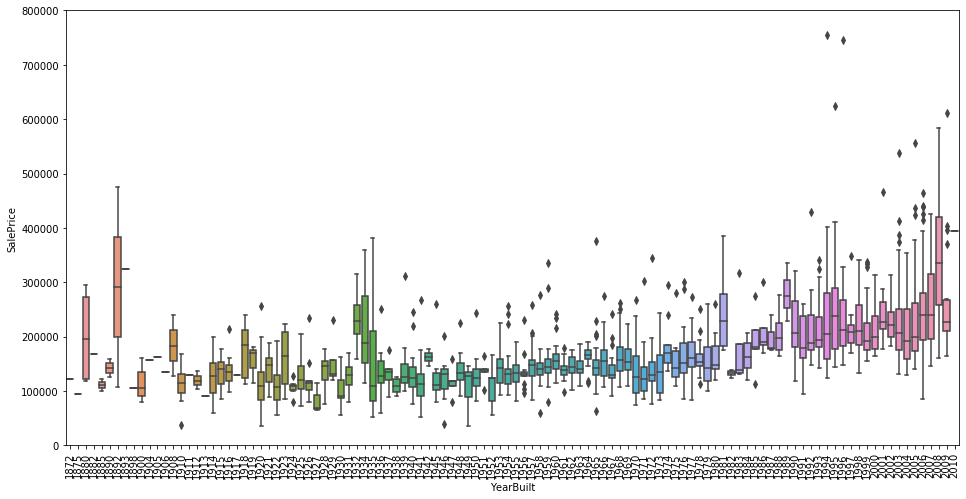

In [15]:
var = 'YearBuilt'
data = pd.concat([house_prices['SalePrice'], house_prices[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

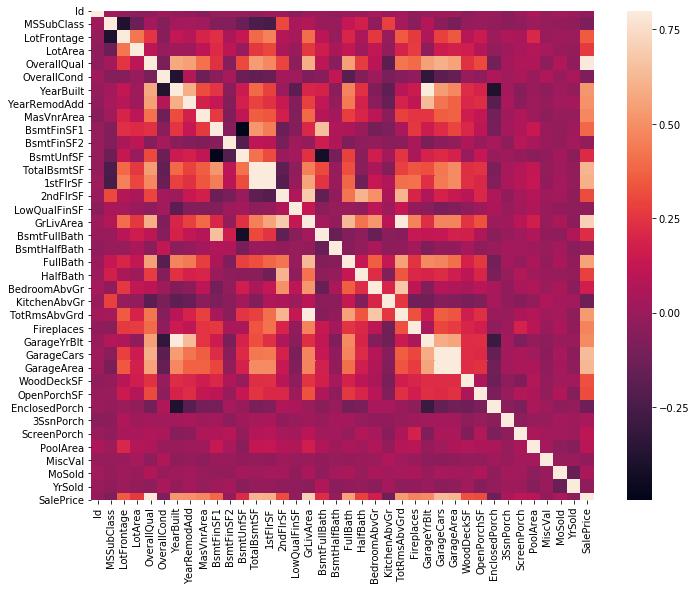

In [16]:
#PlasmaSoup
#Correlation Matrix
corrmat = house_prices.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

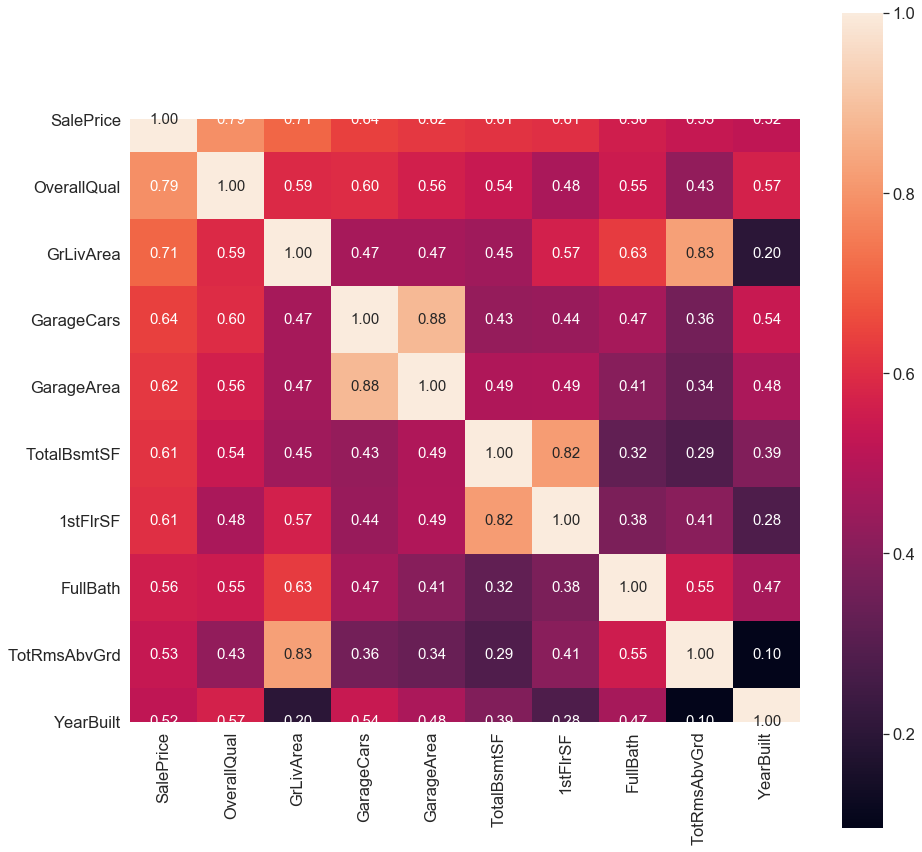

In [17]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(house_prices[cols].values.T)
sns.set(font_scale=1.5)
plt.subplots(figsize=(15,15))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 15}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

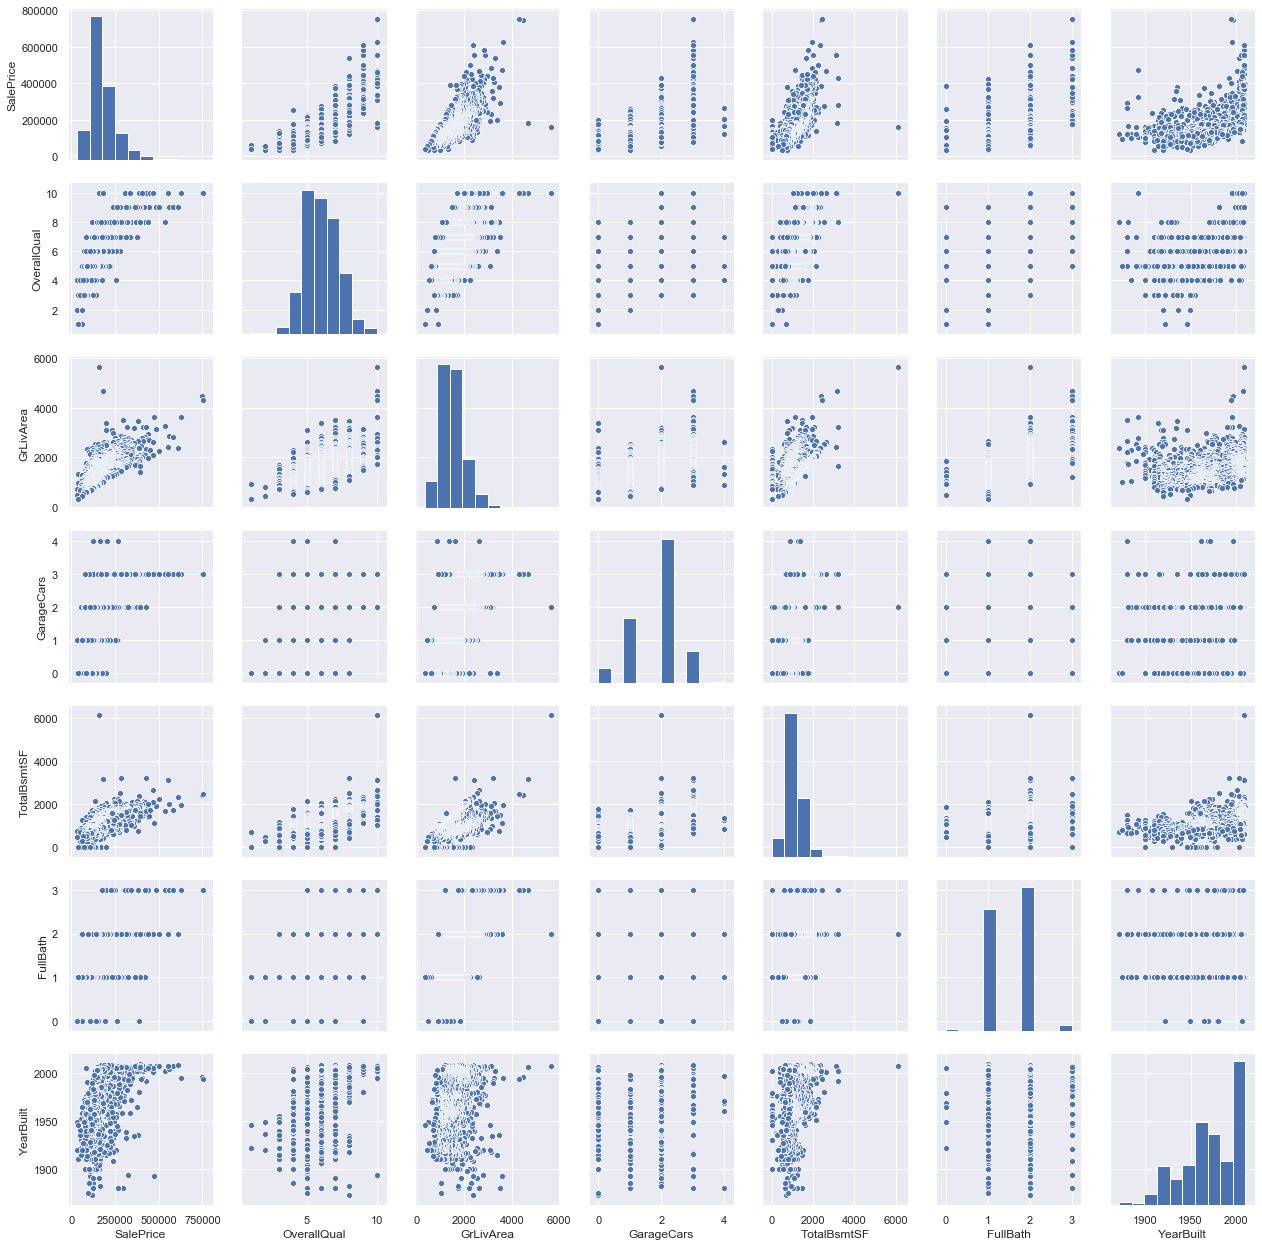

In [18]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(house_prices[cols], size = 2.5)
plt.show();

## Missing Data

In [19]:
#missing data
total = house_prices.isnull().sum().sort_values(ascending=False)
percent = (house_prices.isnull().sum()/house_prices.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [20]:
#dealing with missing data
house_prices = house_prices.drop((missing_data[missing_data['Total'] > 1]).index,1)
house_prices = house_prices.drop(house_prices.loc[house_prices['Electrical'].isnull()].index)
house_prices.isnull().sum().max() #just checking that there's no missing data missing...

0

# Outliers

## Univariate analysis

In [21]:
#standardizing data
#standardization means converting data values to have mean of 0 and a standard deviation of 1
saleprice_scaled = StandardScaler().fit_transform(house_prices['SalePrice'][:,np.newaxis]);
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-1.83820775]
 [-1.83303414]
 [-1.80044422]
 [-1.78282123]
 [-1.77400974]
 [-1.62295562]
 [-1.6166617 ]
 [-1.58519209]
 [-1.58519209]
 [-1.57269236]]

outer range (high) of the distribution:
[[3.82758058]
 [4.0395221 ]
 [4.49473628]
 [4.70872962]
 [4.728631  ]
 [5.06034585]
 [5.42191907]
 [5.58987866]
 [7.10041987]
 [7.22629831]]


## Bivariate Analysis (to discover outliers)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


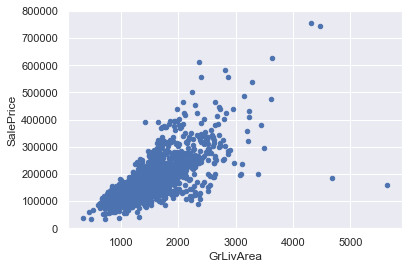

In [22]:
#bivariate analysis saleprice/grlivarea
var = 'GrLivArea'
data = pd.concat([house_prices['SalePrice'], house_prices[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));


In [23]:
#deleting points
house_prices.sort_values(by = 'GrLivArea', ascending = False)[:2]
house_prices = house_prices.drop(house_prices[house_prices['Id'] == 1299].index)
house_prices = house_prices.drop(house_prices[house_prices['Id'] == 524].index)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


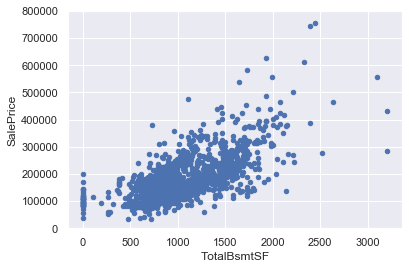

In [24]:
#bivariate analysis saleprice/grlivarea
var = 'TotalBsmtSF'
data = pd.concat([house_prices['SalePrice'], house_prices[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

# Before Predicting CHECK FOR NORMALITY

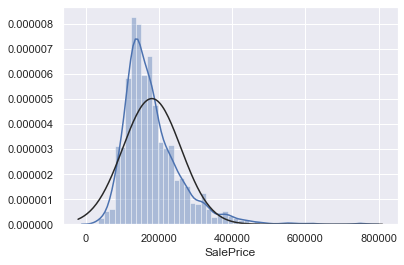

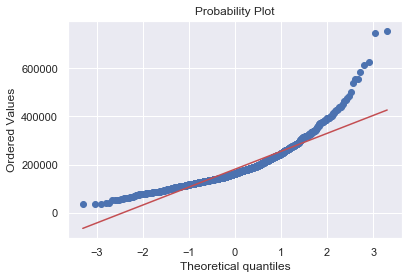

In [25]:
#histogram and normal probability plot
sns.distplot(house_prices['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(house_prices['SalePrice'], plot=plt)

In [26]:
#applying log transformation
#abbraca dabbra!
#changes the data to normal dist
house_prices['SalePrice'] = np.log(house_prices['SalePrice'])

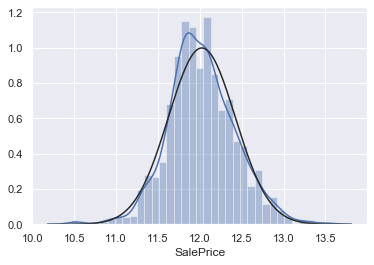

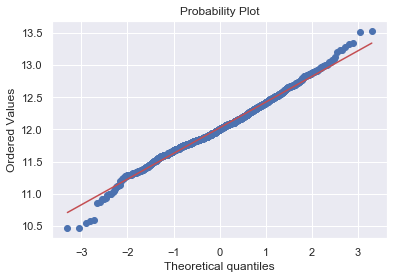

In [27]:
#transformed histogram and normal probability plot
sns.distplot(house_prices['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(house_prices['SalePrice'], plot=plt)

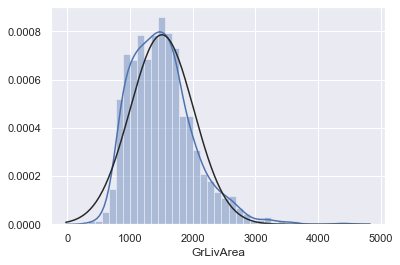

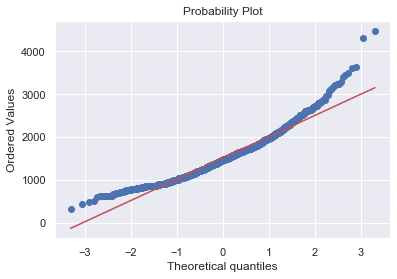

In [28]:
#histogram and normal probability plot
sns.distplot(house_prices['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(house_prices['GrLivArea'], plot=plt)

In [29]:
#tastes like skewness abbraca dabbra!

In [30]:
house_prices['GrLivArea'] = np.log(house_prices['GrLivArea'])

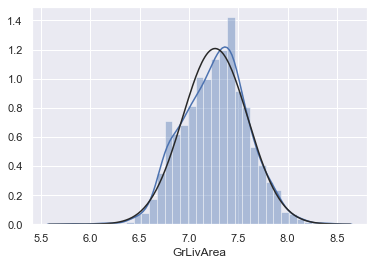

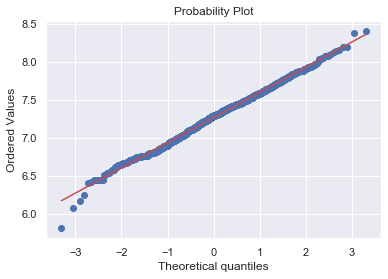

In [31]:
#transformed histogram and probability plot
sns.distplot(house_prices['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(house_prices['GrLivArea'], plot=plt)

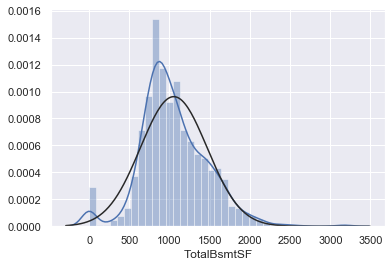

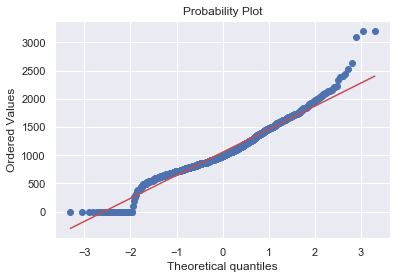

In [32]:
#histogram and normal probability plot
sns.distplot(house_prices['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(house_prices['TotalBsmtSF'], plot=plt)

In [33]:
#zero values doesn't allow us to log transform

In [34]:
#create column for new variable (one is enough because it's a binary categorical feature)
#if area>0 it gets 1, for area==0 it gets 0
house_prices['HasBsmt'] = pd.Series(len(house_prices['TotalBsmtSF']), index=house_prices.index)
house_prices['HasBsmt'] = 0 
house_prices.loc[house_prices['TotalBsmtSF']>0,'HasBsmt'] = 1

In [35]:
#now log tranform the TotalBsmtSF values
house_prices['TotalBsmtSF'] = np.log(house_prices['TotalBsmtSF'])

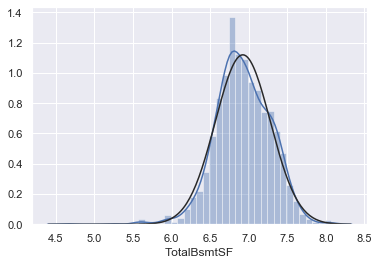

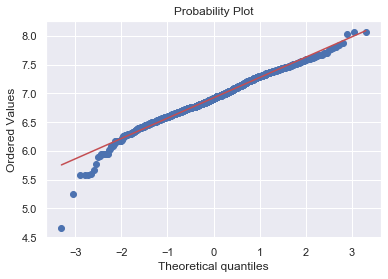

In [36]:
#fingers crossed, lessss plot!
sns.distplot(house_prices[house_prices['TotalBsmtSF']>0]['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(house_prices[house_prices['TotalBsmtSF']>0]['TotalBsmtSF'], plot=plt)

# Homoscedasticity

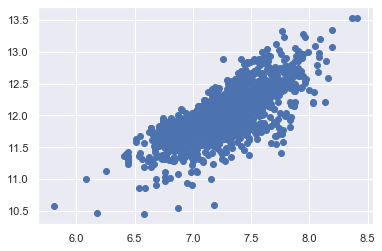

In [37]:
#scatter plot
plt.scatter(house_prices['GrLivArea'], house_prices['SalePrice']);
#no conic shape

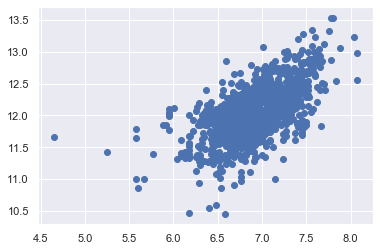

In [38]:
#scatter plot
plt.scatter(house_prices[house_prices['TotalBsmtSF']>0]['TotalBsmtSF'], house_prices[house_prices['TotalBsmtSF']>0]['SalePrice']);

In [39]:
#We can say that, in general, 'SalePrice' exhibit equal levels of variance across the range of 'TotalBsmtSF'. Cool!

In [40]:
#last
#convert categorical variable into dummy
house_prices = pd.get_dummies(house_prices)

In [41]:
#starting my random forest prediction
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [42]:
y = house_prices.SalePrice
houseprices_features = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
X = house_prices[houseprices_features]

In [43]:
y.describe()

count    1457.000000
mean       12.024005
std         0.399853
min        10.460242
25%        11.774520
50%        12.001505
75%        12.273731
max        13.534473
Name: SalePrice, dtype: float64

In [44]:
houseprice_model = RandomForestRegressor(criterion='mae', random_state=1)

In [47]:
houseprice_model.fit(X, y)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [49]:
house_prices = house_prices.as_matrix().astype(np.float)
print(np.any(np.isnan(house_prices)))
print(np.all(np.isfinite(house_prices)))

False
False


## Therefore data contains infinite value somewhere

In [52]:
#house_prices =house_prices[~house_prices.isin([np.nan, np.inf, -np.inf]).any(1)]

AttributeError: 'numpy.ndarray' object has no attribute 'isin'

In [53]:
print(np.__version__)

1.16.5


In [57]:
house_prices[X.replace([np.inf, -np.inf], np.nan).notnull().all(axis=1)]

array([[1.1830e+03, 6.0000e+01, 1.5623e+04, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [6.9200e+02, 6.0000e+01, 2.1535e+04, ..., 0.0000e+00, 1.0000e+00,
        0.0000e+00],
       [1.1700e+03, 6.0000e+01, 3.5760e+04, ..., 0.0000e+00, 1.0000e+00,
        0.0000e+00],
       ...,
       [3.0000e+01, 3.0000e+01, 6.3240e+03, ..., 0.0000e+00, 1.0000e+00,
        0.0000e+00],
       [9.1700e+02, 2.0000e+01, 9.0000e+03, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [1.1010e+03, 3.0000e+01, 8.4000e+03, ..., 0.0000e+00, 1.0000e+00,
        0.0000e+00]])

In [59]:
houseprice_model.fit(X, y)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').